# Word Frequency in the Papers

This notebook looks at the word frequency of Cholera, Vaccine, Vets

In [4]:
import pandas as pd # For dataframe analysis
import numpy as np
import re # Regix to remove punctuation from strings I split
from sklearn.feature_extraction.text import CountVectorizer # For creating document-term matrix & excluding stop words
from sklearn.feature_extraction import text # For getting stop words
import matplotlib.pyplot as plt # For graphs
import seaborn as sns # For graphs
import os
%matplotlib inline

In [5]:
wordList = ['cholera']

In [11]:
textList = []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)
df = pd.DataFrame(textList)
df.columns = ['text']
df

,text
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."
...,...
463,[NLS note: a graphic appears here - see image ...
464,REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
465,ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
466,SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...


In [7]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [12]:
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df = cleandf

In [13]:
df

,text
0,ipqb10 m91b no 44 new series scientific memoir...
1,ip6hgs4 report on the calcutta medical institu...
2,cholera in india 1862 to 1881 bengal province ...
3,vol i 1931 the indian journal of veterinary sc...
4,ipqb 10 m91b no 19 new series scientific memoi...
...,...
463,nls note a graphic appears here see image of ...
464,report on the working of the mental hospitals ...
465,icar 15 viii 650 vol viii 1938 the indian jour...
466,sleeping sickness a summary of the work done b...


In [14]:
vectorizer = CountVectorizer(stop_words='english')
dataVectorizer = vectorizer.fit_transform(df.text)
dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
dataDtm.index = df.index # lets get the indices from previous dataframe
dataDtm = dataDtm.transpose() # Take a transpose
dataDtm # Take a look at the matrix

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
00,0,0,6,5,0,0,170,0,2,0,...,0,3,0,0,11,0,0,0,0,0
000,0,0,4,0,0,0,4,0,0,0,...,0,0,0,0,0,3,0,0,0,0
0000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
00000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
öotype,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ùpon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
únmádmadness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
únprotected,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dataTf = dataDtm.transpose()[wordList]
dataTf

,cholera
0,3
1,61
2,995
3,2
4,0
...,...
463,0
464,0
465,1
466,0


In [16]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,cholera,sum
0,3,3
1,61,61
2,995,995
3,2,2
4,0,0
...,...,...
463,0,0
464,0,0
465,1,1
466,0,0


Text(0.5, 1.0, 'Mention of Cholera')

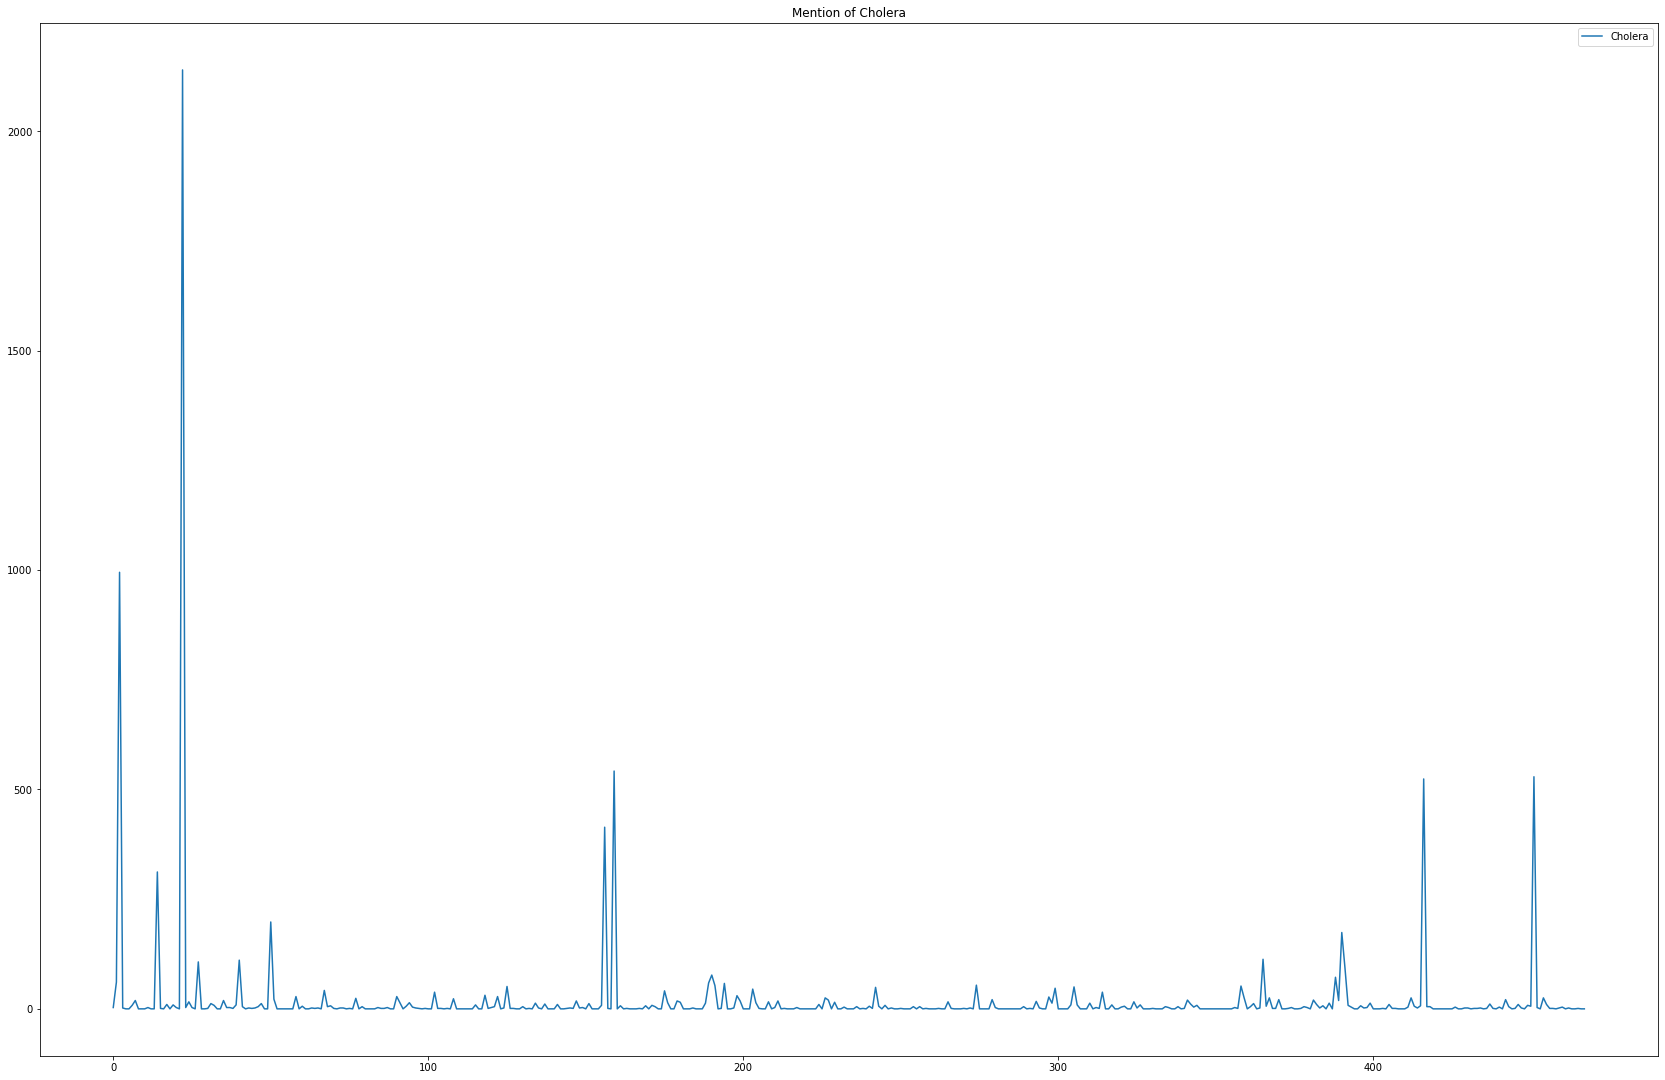

In [18]:
plt.figure(figsize=(29, 19))
fileNums = list(range(0, 468))
# plt.subplot(4, 3, index+1)
plt.plot(fileNums, dataTf['sum'], label='Cholera')
plt.legend()
plt.title('Mention of Cholera') # make the term the title

In [19]:
wordList2 = ['vaccine', 'vaccines', 'vaccinations', 'vaccination', 'immunisation', 'immunisations',  'jab', 'immunity']
dataTf = dataDtm.transpose()[wordList2]
dataTf

,vaccine,vaccines,vaccinations,vaccination,immunisation,immunisations,jab,immunity
0,75,16,0,1,6,0,0,19
1,0,0,0,9,0,0,0,4
2,0,0,0,0,0,0,0,27
3,51,1,0,7,17,0,0,33
4,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...
463,13,3,0,0,0,0,0,0
464,0,0,0,0,0,0,0,0
465,11,0,0,15,3,0,1,39
466,0,0,0,0,0,0,0,5


In [20]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,vaccine,vaccines,vaccinations,vaccination,immunisation,immunisations,jab,immunity,sum
0,75,16,0,1,6,0,0,19,117
1,0,0,0,9,0,0,0,4,13
2,0,0,0,0,0,0,0,27,27
3,51,1,0,7,17,0,0,33,109
4,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...
463,13,3,0,0,0,0,0,0,16
464,0,0,0,0,0,0,0,0,0
465,11,0,0,15,3,0,1,39,69
466,0,0,0,0,0,0,0,5,5


Text(0.5, 1.0, 'Mention of Vaccine and Related Words')

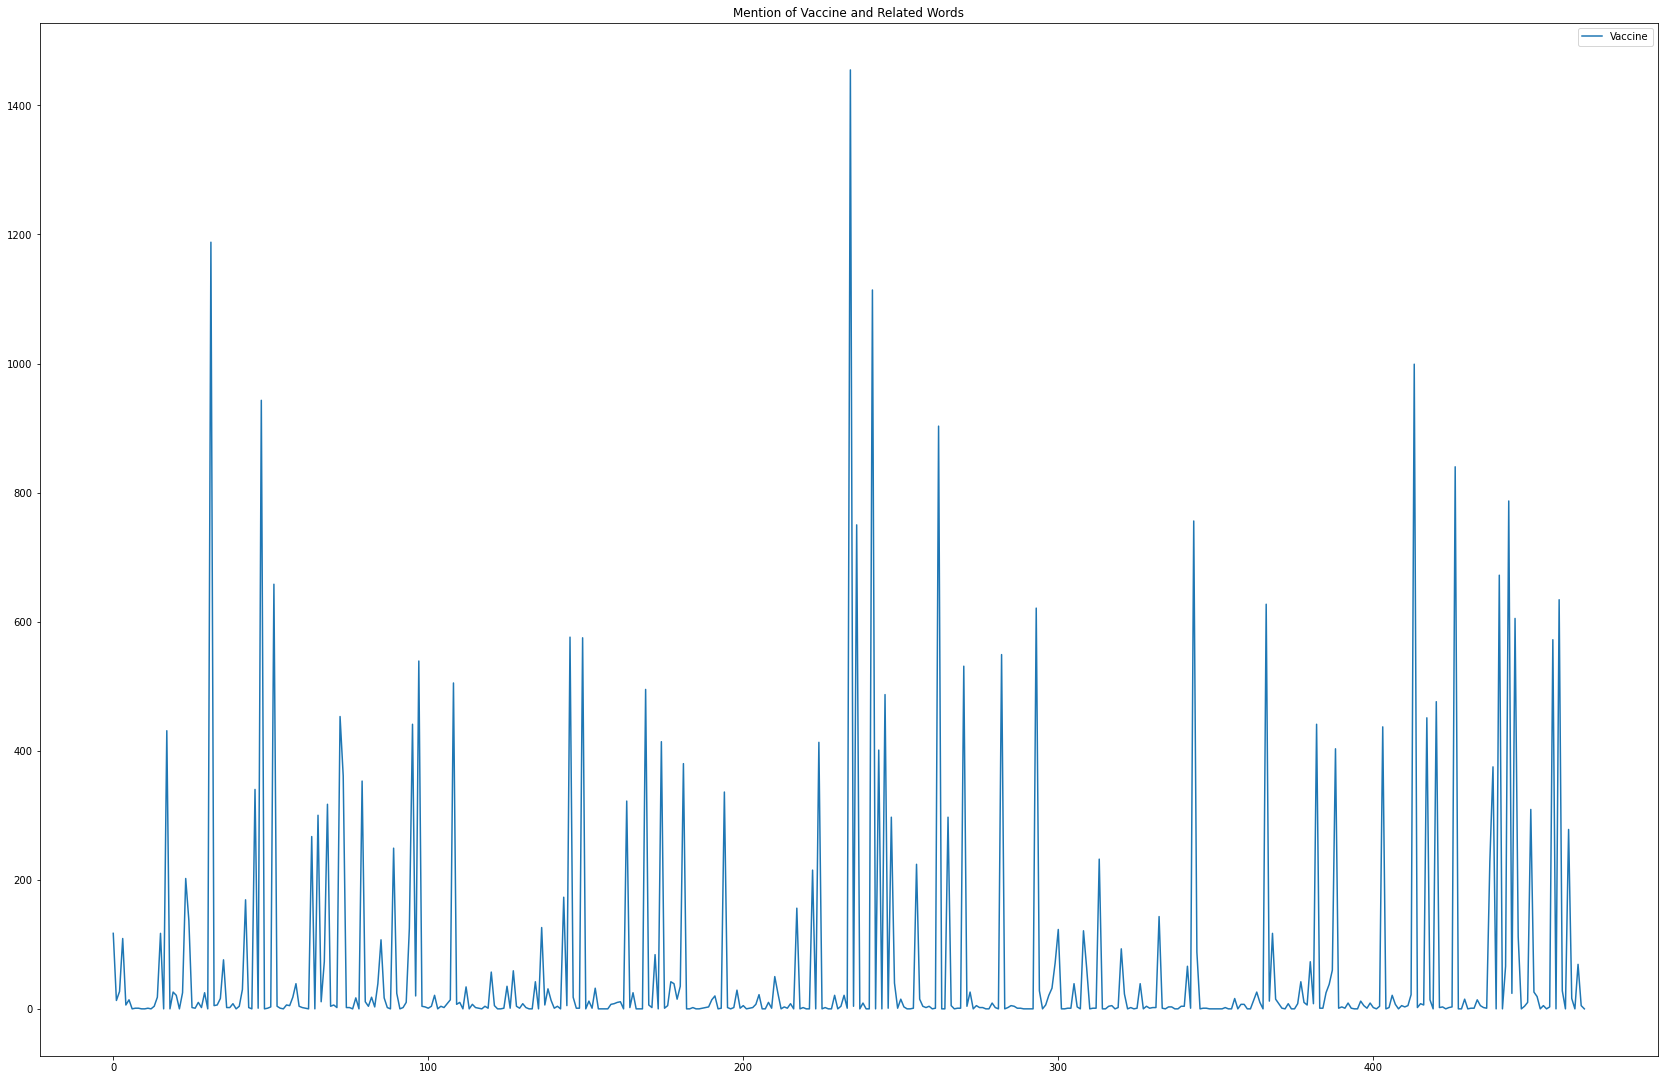

In [21]:
plt.figure(figsize=(29, 19))
fileNums = list(range(0, 468))
# plt.subplot(4, 3, index+1)
plt.plot(fileNums, dataTf['sum'], label='Vaccine')
plt.legend()
plt.title('Mention of Vaccine and Related Words') # make the term the title

In [22]:
wordList2 = ['veterinary', 'vet', 'veterinarian']
dataTf = dataDtm.transpose()[wordList2]
dataTf

,veterinary,vet,veterinarian
0,0,0,0
1,0,0,0
2,0,0,0
3,255,49,6
4,0,0,0
...,...,...,...
463,0,0,0
464,0,0,0
465,147,32,9
466,0,0,0


In [23]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,veterinary,vet,veterinarian,sum
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,255,49,6,310
4,0,0,0,0
...,...,...,...,...
463,0,0,0,0
464,0,0,0,0
465,147,32,9,188
466,0,0,0,0


Text(0.5, 1.0, 'Mention of Veterinary and Related Words')

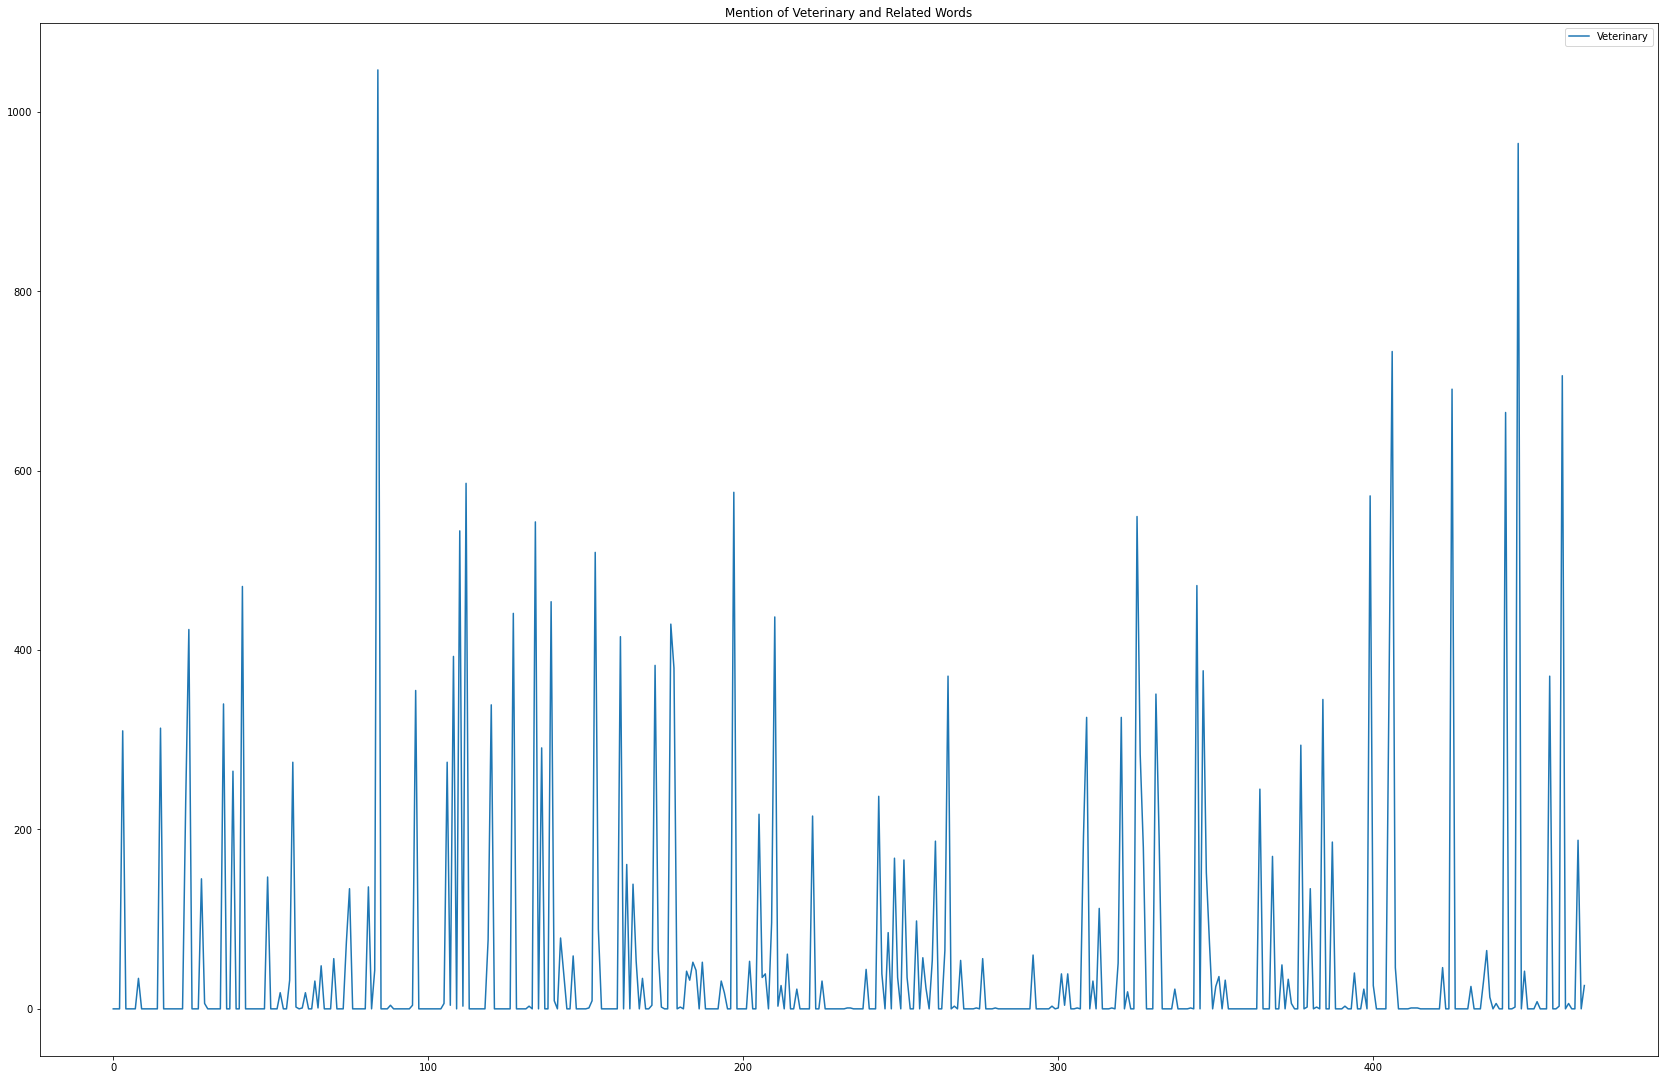

In [25]:
plt.figure(figsize=(29, 19))
fileNums = list(range(0, 468))
# plt.subplot(4, 3, index+1)
plt.plot(fileNums, dataTf['sum'], label='Veterinary')
plt.legend()
plt.title('Mention of Veterinary and Related Words') # make the term the title

In [26]:
wordList3 = ['plague']
dataTf = dataDtm.transpose()[wordList3]
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,plague,sum
0,2,2
1,17,17
2,0,0
3,2,2
4,0,0
...,...,...
463,3,3
464,0,0
465,3,3
466,1,1


Text(0.5, 1.0, 'Mention of Plague and Related Words')

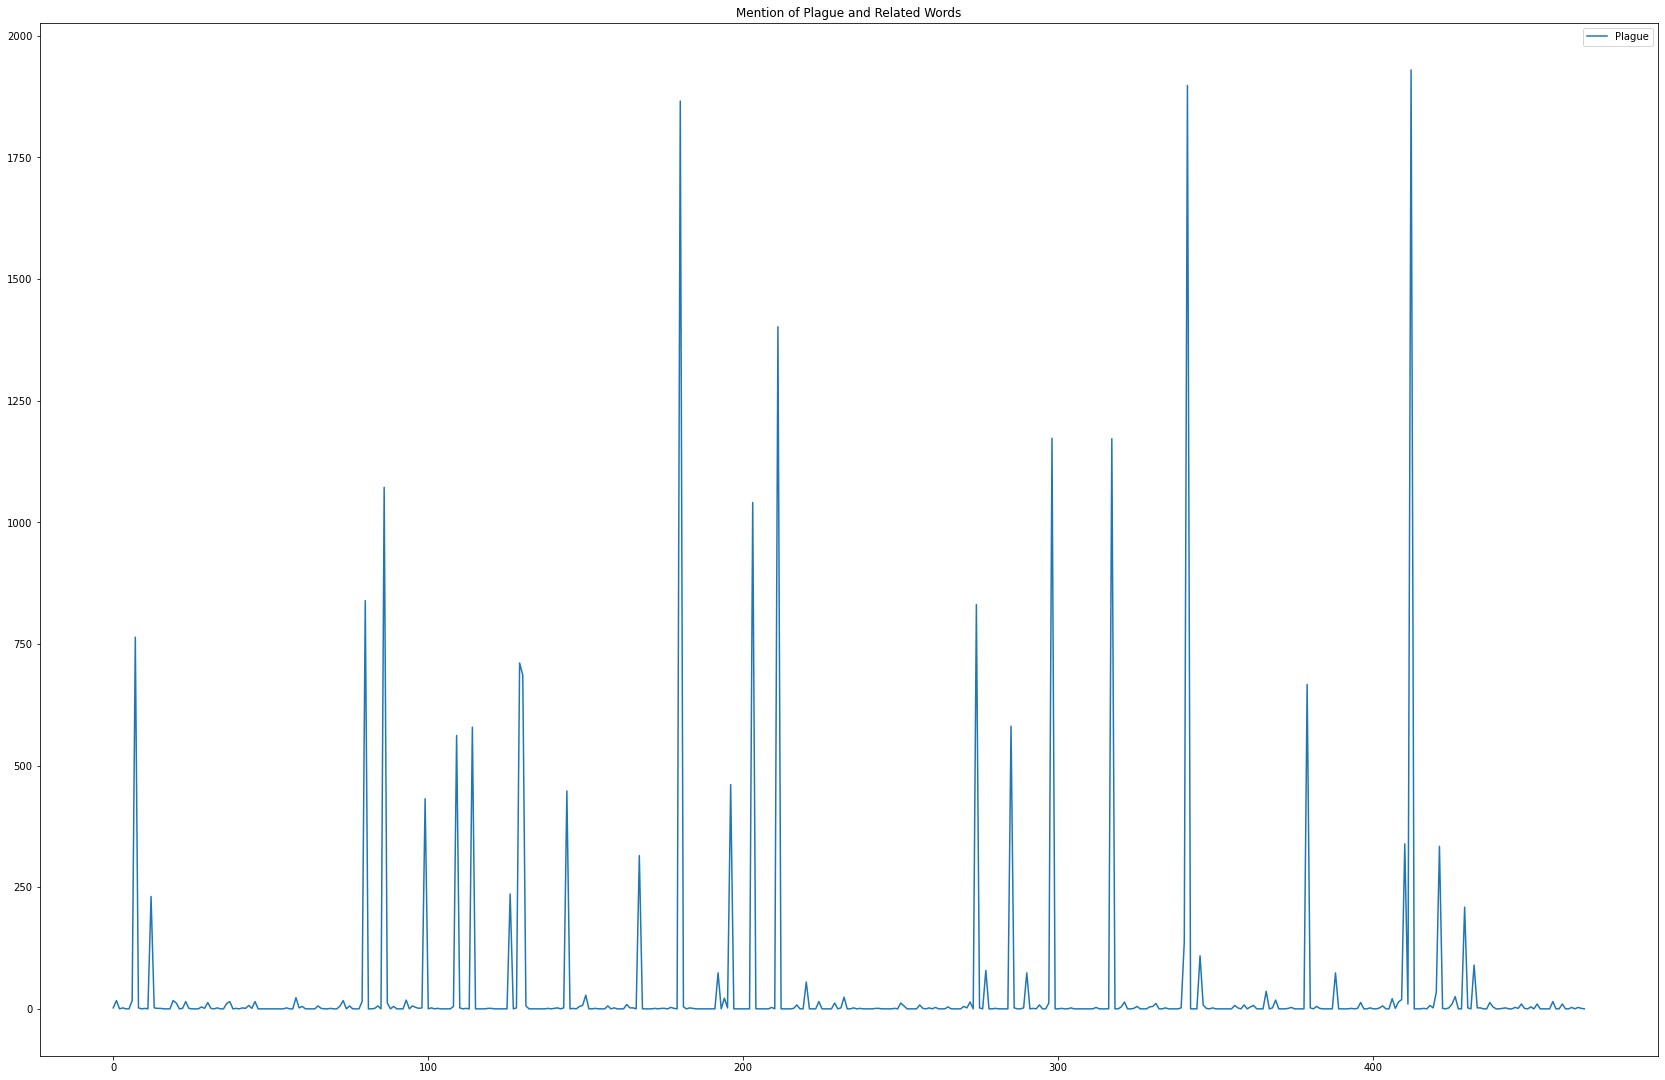

In [27]:
plt.figure(figsize=(29, 19))
fileNums = list(range(0, 468))
# plt.subplot(4, 3, index+1)
plt.plot(fileNums, dataTf['sum'], label='Plague')
plt.legend()
plt.title('Mention of Plague and Related Words') # make the term the title